<a href="https://colab.research.google.com/github/SNEHILPANDEY15/FDA-assignment-/blob/main/Snehil_Set_Exercise_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [145]:
#Creating the wine dataset table
data = {
    "WINE":[1,2,3,4,5,6,7,8,9,10],
    "PRICE":["m","e","e","m","m","m","e","b","b","m"],
    "TYPE":["w","d","d","w","w","d","sp","r","d","d"],
    "Characteristic":["a","t","a","sw","sw","t","a","t","a","b"],
    "Origin":["aaa","am","am","am","eu","eu","aaa","eu","aaa","aaa"],
    "Decision":["to buy","to buy","to buy","to buy","to buy","not to buy","not to buy","not to buy","not to buy","not to buy"],

}
df = pd.DataFrame(data)
df

,WINE,PRICE,TYPE,Characteristic,Origin,Decision
0,1,m,w,a,aaa,to buy
1,2,e,d,t,am,to buy
2,3,e,d,a,am,to buy
3,4,m,w,sw,am,to buy
4,5,m,w,sw,eu,to buy
5,6,m,d,t,eu,not to buy
6,7,e,sp,a,aaa,not to buy
7,8,b,r,t,eu,not to buy
8,9,b,d,a,aaa,not to buy
9,10,m,d,b,aaa,not to buy


In [146]:
# Calculating Entropy
def entropy(labels):
    counts = labels.value_counts()
    total = len(labels)
    ent = 0
    for c in counts:
        p = c / total
        ent -= p * math.log2(p)
    return ent


parent_entropy = entropy(df["Decision"])
print(parent_entropy)


1.0


In [147]:
#Calculating Parent Entropy
parent_entropy = entropy(df["Decision"])


print("PARENT ENTROPY CALCULATION")

print(f"\nTotal samples: {len(df)}")
print(f"'to buy': {(df['Decision'] == 'to buy').sum()} → p = {(df['Decision'] == 'to buy').sum()}/10 = 0.4")
print(f"'not to buy': {(df['Decision'] == 'not to buy').sum()} → p = {(df['Decision'] == 'not to buy').sum()}/10 = 0.6")
print(f"\nFormula: H(S) = -(p_buy × log₂(p_buy) + p_not × log₂(p_not))")
print(f"H(S) = -(0.4 × {math.log2(0.4):.4f} + 0.6 × {math.log2(0.6):.4f})")
print(f"H(S) = {parent_entropy:.4f} bits")
print(f"\nInterpretation: Dataset has {parent_entropy:.4f} bits of entropy (impurity)")

PARENT ENTROPY CALCULATION

Total samples: 10
'to buy': 5 → p = 5/10 = 0.4
'not to buy': 5 → p = 5/10 = 0.6

Formula: H(S) = -(p_buy × log₂(p_buy) + p_not × log₂(p_not))
H(S) = -(0.4 × -1.3219 + 0.6 × -0.7370)
H(S) = 1.0000 bits

Interpretation: Dataset has 1.0000 bits of entropy (impurity)


In [148]:
#Calculating counts
to_buy_count = (df['Decision'] == 'to buy').sum()
not_to_buy_count = (df['Decision'] == 'not to buy').sum()
total = len(df)

#Calculating probabilities
p_buy = to_buy_count / total
p_not_buy = not_to_buy_count / total

#Display results
print("PARENT ENTROPY CALCULATION")
print(f"Total samples: {total}")
print(f"'to buy': {to_buy_count} samples, probability = {p_buy}")
print(f"'not to buy': {not_to_buy_count} samples, probability = {p_not_buy}")

#Calculating entropy step by step
log_buy = math.log2(p_buy)
log_not_buy = math.log2(p_not_buy)

print(f"\nEntropy formula: H(S) = -(p_buy × log₂(p_buy) + p_not_buy × log₂(p_not_buy))")
print(f"H(S) = -({p_buy} × {log_buy:.4f} + {p_not_buy} × {log_not_buy:.4f})")
print(f"Parent Entropy = {parent_entropy:.4f} bits")


PARENT ENTROPY CALCULATION
Total samples: 10
'to buy': 5 samples, probability = 0.5
'not to buy': 5 samples, probability = 0.5

Entropy formula: H(S) = -(p_buy × log₂(p_buy) + p_not_buy × log₂(p_not_buy))
H(S) = -(0.5 × -1.0000 + 0.5 × -1.0000)
Parent Entropy = 1.0000 bits


In [149]:
def information_gain(feature_col, target_col):
    "Calculate information gain for a feature"
    parent_ent = entropy(target_col)

    #For Getting unique values in the feature
    values = feature_col.unique()
    weighted_entropy = 0

    #For every value,calculate entropy of that subset
    for value in values:
        mask = feature_col == value
        subset = target_col[mask]
        weight = len(subset) / len(target_col)
        subset_ent = entropy(subset)
        weighted_entropy += weight * subset_ent

        #Show the split details
        print(f"\n{feature_col.name} = '{value}': {len(subset)} samples")
        decisions = subset.value_counts()
        print(f"  to buy: {decisions.get('to buy', 0)}, not to buy: {decisions.get('not to buy', 0)}")
        print(f"  Entropy = {subset_ent:.4f}")

    #Calculating information gain
    ig = parent_ent - weighted_entropy
    return ig

#Calculating Information Gain for TYPE
print("INFORMATION GAIN FOR TYPE")

ig_type = information_gain(df['TYPE'], df['Decision'])

print(f"\nWeighted Average Entropy = {parent_entropy - ig_type:.4f}")
print(f"Information Gain (TYPE) = {parent_entropy:.4f} - {parent_entropy - ig_type:.4f}")
print(f"Information Gain (TYPE) = {ig_type:.4f} bits")


INFORMATION GAIN FOR TYPE

TYPE = 'w': 3 samples
  to buy: 3, not to buy: 0
  Entropy = 0.0000

TYPE = 'd': 5 samples
  to buy: 2, not to buy: 3
  Entropy = 0.9710

TYPE = 'sp': 1 samples
  to buy: 0, not to buy: 1
  Entropy = 0.0000

TYPE = 'r': 1 samples
  to buy: 0, not to buy: 1
  Entropy = 0.0000

Weighted Average Entropy = 0.4855
Information Gain (TYPE) = 1.0000 - 0.4855
Information Gain (TYPE) = 0.5145 bits


In [150]:
#Calculating Information Gain for all attributes
print("INFORMATION GAIN FOR ALL ATTRIBUTES")
attributes = ['PRICE', 'TYPE', 'Characteristic', 'Origin']
ig_results = {}

for attr in attributes:
    print(f"\n--- {attr} ---")
    ig = information_gain(df[attr], df['Decision'])
    ig_results[attr] = ig
    print(f"Information Gain ({attr}) = {ig:.4f} bits\n")

#Comparing results
print("\nCOMPARISON OF ALL ATTRIBUTES")
for attr in attributes:
    print(f"{attr}: {ig_results[attr]:.4f} bits")

#Finding the best and second-best attributes
sorted_igs = sorted(ig_results.items(), key=lambda x: x[1], reverse=True)

best_attr, best_ig = sorted_igs[0]
second_best_attr, second_best_ig = sorted_igs[1]

print(f"\nBest attribute to split: {best_attr}")
print(f"Information Gain: {best_ig:.4f} bits")

print(f"\nNext best attribute: {second_best_attr}")
print(f"Information Gain: {second_best_ig:.4f} bits")

INFORMATION GAIN FOR ALL ATTRIBUTES

--- PRICE ---

PRICE = 'm': 5 samples
  to buy: 3, not to buy: 2
  Entropy = 0.9710

PRICE = 'e': 3 samples
  to buy: 2, not to buy: 1
  Entropy = 0.9183

PRICE = 'b': 2 samples
  to buy: 0, not to buy: 2
  Entropy = 0.0000
Information Gain (PRICE) = 0.2390 bits


--- TYPE ---

TYPE = 'w': 3 samples
  to buy: 3, not to buy: 0
  Entropy = 0.0000

TYPE = 'd': 5 samples
  to buy: 2, not to buy: 3
  Entropy = 0.9710

TYPE = 'sp': 1 samples
  to buy: 0, not to buy: 1
  Entropy = 0.0000

TYPE = 'r': 1 samples
  to buy: 0, not to buy: 1
  Entropy = 0.0000
Information Gain (TYPE) = 0.5145 bits


--- Characteristic ---

Characteristic = 'a': 4 samples
  to buy: 2, not to buy: 2
  Entropy = 1.0000

Characteristic = 't': 3 samples
  to buy: 1, not to buy: 2
  Entropy = 0.9183

Characteristic = 'sw': 2 samples
  to buy: 2, not to buy: 0
  Entropy = 0.0000

Characteristic = 'b': 1 samples
  to buy: 0, not to buy: 1
  Entropy = 0.0000
Information Gain (Characteri

In [151]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

#Load TXT from Google Drive link
file_id = "1-ZfPJMcwueTbTxEsRug-fKSim9lhcNfa"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

response = requests.get(url)
response.raise_for_status()
lines = response.text.splitlines()

#Your existing parsing logic
rows = []

for line in lines:
    line = line.strip()
    if not line:
        continue

    line = line.replace("array(", "")
    line = line.replace("])", "")
    line = line.replace(")]", "")
    line = line.replace("[", "")
    line = line.replace("]", "")

    parts = [p.strip() for p in line.split(",") if p.strip() != ""]

    try:
        nums = [float(p) for p in parts]
    except ValueError:
        continue

    if len(nums) == 4:
        rows.append(nums)

data = np.array(rows)
df_clust = pd.DataFrame(data, columns=["Feature1", "Feature2", "Feature3", "Feature4"])

print(df_clust.head())
print("Shape:", df_clust.shape)


   Feature1  Feature2  Feature3  Feature4
0       5.1       3.5       1.4       0.2
1       4.9       3.0       1.4       0.2
2       4.7       3.2       1.3       0.2
3       4.6       3.1       1.5       0.2
4       5.0       3.6       1.4       0.2
Shape: (150, 4)


In [152]:
#Standardizing features for K-means
scaler = StandardScaler()
X = df_clust.values
X_scaled = scaler.fit_transform(X)

print("Data shape after scaling:", X_scaled.shape)


Data shape after scaling: (150, 4)


K-MEANS: ELBOW METHOD AND SILHOUETTE SCORES
k = 2: Inertia = 222.36, Silhouette = 0.5818
k = 3: Inertia = 139.82, Silhouette = 0.4599
k = 4: Inertia = 114.09, Silhouette = 0.3869
k = 5: Inertia = 90.93, Silhouette = 0.3459
k = 6: Inertia = 81.54, Silhouette = 0.3171
k = 7: Inertia = 72.63, Silhouette = 0.3202
k = 8: Inertia = 62.54, Silhouette = 0.3387
k = 9: Inertia = 55.12, Silhouette = 0.3424
k = 10: Inertia = 47.39, Silhouette = 0.3518


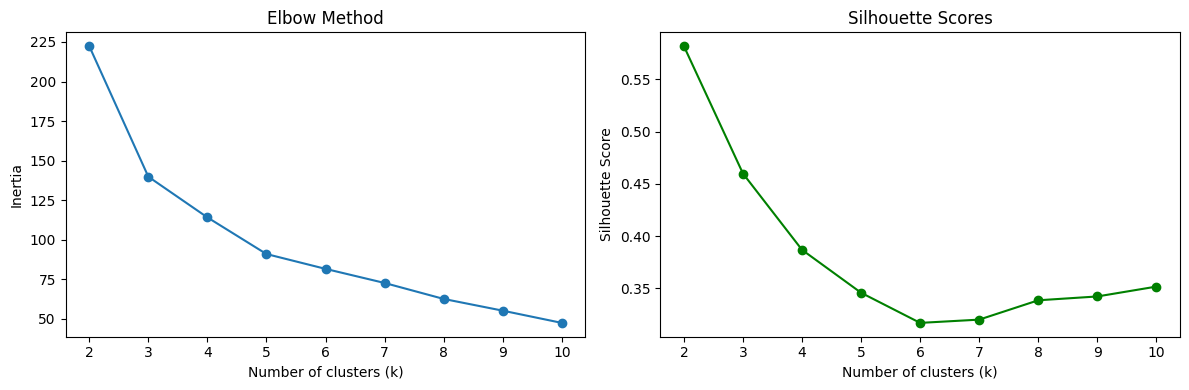

In [153]:
print("K-MEANS: ELBOW METHOD AND SILHOUETTE SCORES")

k_values = range(2, 11)
inertias = []
sil_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    sil = silhouette_score(X_scaled, kmeans.labels_)
    sil_scores.append(sil)
    print(f"k = {k}: Inertia = {kmeans.inertia_:.2f}, Silhouette = {sil:.4f}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")

plt.subplot(1, 2, 2)
plt.plot(k_values, sil_scores, marker="o", color="green")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores")

plt.tight_layout()
plt.show()


In [154]:
#Choosing k based on the plots
k_optimal = 3

print(f"\nFINAL K-MEANS MODEL WITH k = {k_optimal}")

kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

df_clust["Cluster"] = cluster_labels

print("Cluster labels assigned.")



FINAL K-MEANS MODEL WITH k = 3
Cluster labels assigned.


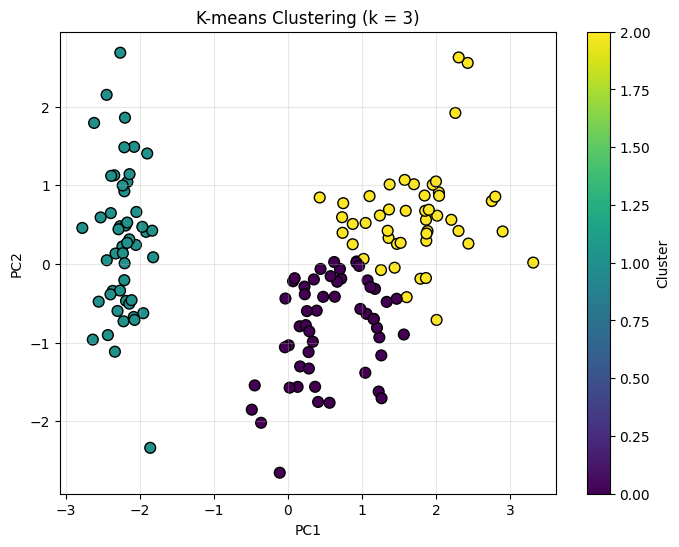

In [155]:
#==Visualizing clusters in 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=cluster_labels,
    cmap="viridis",
    s=60,
    edgecolors="black"
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"K-means Clustering (k = {k_optimal})")
plt.colorbar(scatter, label="Cluster")
plt.grid(alpha=0.3)
plt.show()


In [156]:
print("\nCLUSTER SIZES")
cluster_counts = df_clust["Cluster"].value_counts().sort_index()
for c, n in cluster_counts.items():
    print(f"Cluster {c}: {n} samples")

print("\nCLUSTER MEANS (FEATURE PROFILES)")
cluster_means = df_clust.groupby("Cluster")[["Feature1", "Feature2", "Feature3", "Feature4"]].mean().round(2)

for cluster_id, row in cluster_means.iterrows():
    print(f"\n--- Cluster {cluster_id} ---")
    print(f"Feature1 mean: {row['Feature1']}")
    print(f"Feature2 mean: {row['Feature2']}")
    print(f"Feature3 mean: {row['Feature3']}")
    print(f"Feature4 mean: {row['Feature4']}")



CLUSTER SIZES
Cluster 0: 53 samples
Cluster 1: 50 samples
Cluster 2: 47 samples

CLUSTER MEANS (FEATURE PROFILES)

--- Cluster 0 ---
Feature1 mean: 5.8
Feature2 mean: 2.67
Feature3 mean: 4.37
Feature4 mean: 1.41

--- Cluster 1 ---
Feature1 mean: 5.01
Feature2 mean: 3.43
Feature3 mean: 1.46
Feature4 mean: 0.25

--- Cluster 2 ---
Feature1 mean: 6.78
Feature2 mean: 3.1
Feature3 mean: 5.51
Feature4 mean: 1.97


In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

#import pandas as pd

file_id = "10NI3CuXWvAwzz4oUFckgNKsrrlwiFewc"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

df3 = pd.read_csv(url)
print(df3.head())
print("Shape:", df3.shape)


          x         y
0  0.287578  1.164440
1  0.788305 -0.887802
2  0.408977  0.174131
3  0.883017 -0.217437
4  0.940467 -0.076454
Shape: (25, 2)


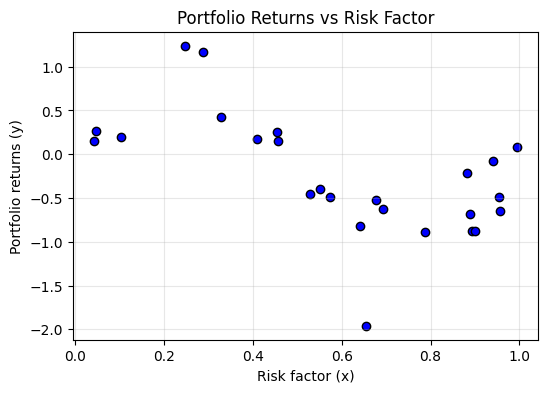

In [158]:
# Basic scatter plot of x vs y
plt.figure(figsize=(6, 4))
plt.scatter(df3["x"], df3["y"], color="blue", edgecolors="black")
plt.xlabel("Risk factor (x)")
plt.ylabel("Portfolio returns (y)")
plt.title("Portfolio Returns vs Risk Factor")
plt.grid(alpha=0.3)
plt.show()

In [159]:
# Define features (X) and target (y)
X = df3[["x"]].values
y = df3[["y"]].values

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 17
Test size: 8


In [160]:
# Model 1:Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_train_lin = lin_reg.predict(X_train)
y_pred_test_lin = lin_reg.predict(X_test)

# Model 2:Polynomial Regression (degree 2)
poly_feat = PolynomialFeatures(degree=2)
X_train_poly = poly_feat.fit_transform(X_train)
X_test_poly = poly_feat.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_train_poly = poly_reg.predict(X_train_poly)
y_pred_test_poly = poly_reg.predict(X_test_poly)

print("Models trained.")


Models trained.


In [161]:
def evaluate_model(y_train, y_pred_train, y_test, y_pred_test, name):
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print(f"\n{name}")
    print("-" * len(name))
    print(f"Train RMSE: {rmse_train:.4f}")
    print(f"Test  RMSE: {rmse_test:.4f}")
    print(f"Test  MAE : {mae_test:.4f}")
    print(f"Train R²  : {r2_train:.4f}")
    print(f"Test  R²  : {r2_test:.4f}")

    return rmse_test, r2_test

rmse_lin, r2_lin = evaluate_model(y_train, y_pred_train_lin, y_test, y_pred_test_lin, "Linear Regression")
rmse_poly, r2_poly = evaluate_model(y_train, y_pred_train_poly, y_test, y_pred_test_poly, "Polynomial Regression (deg 2)")



Linear Regression
-----------------
Train RMSE: 0.4677
Test  RMSE: 0.7446
Test  MAE : 0.5951
Train R²  : 0.3271
Test  R²  : -0.1044

Polynomial Regression (deg 2)
-----------------------------
Train RMSE: 0.4406
Test  RMSE: 0.7944
Test  MAE : 0.6448
Train R²  : 0.4030
Test  R²  : -0.2572



BEST MODEL: Linear Regression


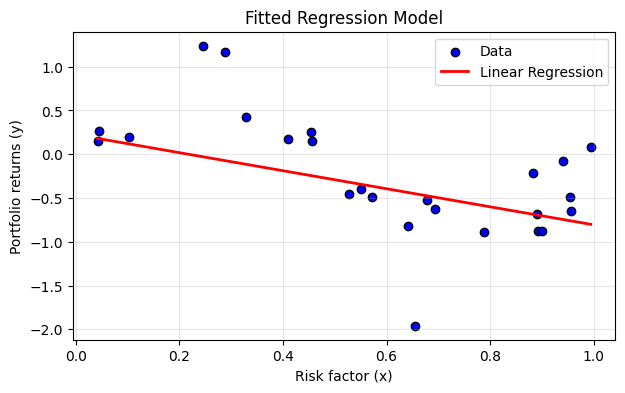

In [162]:
#Deciding best model based on R² on test set
if r2_poly > r2_lin:
    best_name = "Polynomial Regression (deg 2)"
    best_model = poly_reg
    best_is_poly = True
else:
    best_name = "Linear Regression"
    best_model = lin_reg
    best_is_poly = False

print(f"\nBEST MODEL: {best_name}")

# Create smooth x range for plotting the fitted line/curve
x_plot = np.linspace(df3["x"].min(), df3["x"].max(), 100).reshape(-1, 1)

if best_is_poly:
    x_plot_trans = poly_feat.transform(x_plot)
    y_plot = best_model.predict(x_plot_trans)
else:
    y_plot = best_model.predict(x_plot)

# Plot data + fitted model
plt.figure(figsize=(7, 4))
plt.scatter(df3["x"], df3["y"], color="blue", edgecolors="black", label="Data")
plt.plot(x_plot, y_plot, color="red", linewidth=2, label=best_name)
plt.xlabel("Risk factor (x)")
plt.ylabel("Portfolio returns (y)")
plt.title("Fitted Regression Model")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


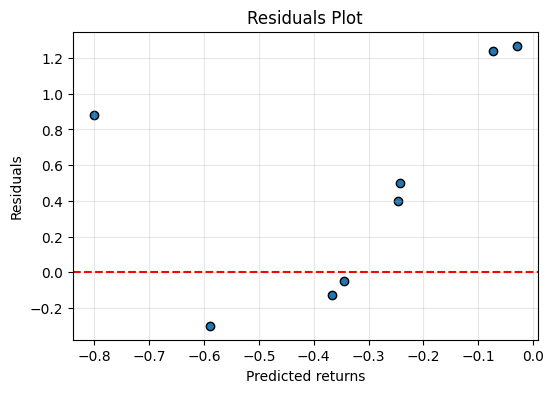


TREND INTERPRETATION
Best model: Linear Regression
Equation: y = -1.0305 * x + 0.2238
Interpretation: As risk factor x increases, expected portfolio returns y tend to decrease.


In [163]:
#Using best model on test set for residuals
if best_is_poly:
    X_test_best = X_test_poly
    y_pred_best = y_pred_test_poly
else:
    X_test_best = X_test
    y_pred_best = y_pred_test_lin

residuals = y_test - y_pred_best

plt.figure(figsize=(6, 4))
plt.scatter(y_pred_best, residuals, edgecolors="black")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted returns")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.grid(alpha=0.3)
plt.show()

# Print simple trend description
print("\nTREND INTERPRETATION")

if not best_is_poly:
    slope = lin_reg.coef_[0][0]
    intercept = lin_reg.intercept_[0]
    print(f"Best model: Linear Regression")
    print(f"Equation: y = {slope:.4f} * x + {intercept:.4f}")
    if slope > 0:
        print("Interpretation: As risk factor x increases, expected portfolio returns y tend to increase.")
    else:
        print("Interpretation: As risk factor x increases, expected portfolio returns y tend to decrease.")
else:
    coef = poly_reg.coef_[0]
    intercept = poly_reg.intercept_[0]
    print("Best model: Polynomial Regression (degree 2)")
    print(f"Equation: y = {coef[2]:.4f} * x^2 + {coef[1]:.4f} * x + {intercept:.4f}")
    print("Interpretation: The relationship between risk and returns is non-linear (curved).")
